In [1]:
import pickle as pickle
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader
import numpy as np
from load_data import *
import matplotlib.pyplot as plt
import re

In [2]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [3]:
train_dataset = load_data("../dataset/train/train.csv")
raw_dataset = pd.read_csv("../dataset/train/train.csv")
train_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation
...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,유기준,부산 서구·동구,per:employee_of
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",최시형,손병희,per:colleagues
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,완도군,신우철,org:top_members/employees
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,no_relation


In [4]:
train_dataset.info

<bound method DataFrame.info of           id                                           sentence  \
0          0  〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...   
1          1  호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...   
2          2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...   
3          3  균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...   
4          4  1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...   
...      ...                                                ...   
32465  32465  한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...   
32466  32466  법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...   
32467  32467  완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...   
32468  32468  중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...   
32469  32469  화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...   

      subject_entity object_entity                      label  
0                비틀즈        조지 해리슨                no_relation  
1              민주평화당          대안신당 

# 데이터 통계

In [5]:
train_dataset.describe(include='all')

,id,sentence,subject_entity,object_entity,label
count,32417.000000,32417,32417,32417,32417
unique,NaN,28803,12052,10226,30
top,NaN,오뚜기 함태호 학술상의 시상은 (재)오뚜기함태호재단 함영준 이사장을 대신해 (재)오...,민주당,대한민국,no_relation
freq,NaN,3,144,276,9513
mean,16223.682235,NaN,NaN,NaN,NaN
std,9371.389475,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,8108.000000,NaN,NaN,NaN,NaN
50%,16220.000000,NaN,NaN,NaN,NaN
75%,24336.000000,NaN,NaN,NaN,NaN


# 데이터 중복 제거

In [6]:
print(len(train_dataset))
train_dataset.drop_duplicates(subset=['sentence','subject_entity','object_entity'], inplace= True)
print(len(train_dataset))

32417
32417


# 데이터 통계

민주당         144
화순군         107
고흥군          99
광주광역시        92
더불어민주당       89
           ... 
방콕 항공         1
팀 다이나믹스       1
조지메이슨대학교      1
존 아담스         1
도쿄 지하철        1
Name: subject_entity, Length: 12052, dtype: int64


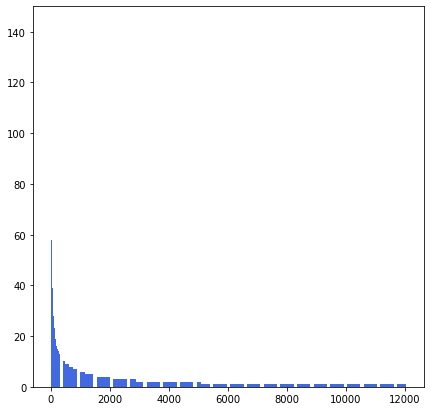

In [7]:
print(train_dataset['subject_entity'].value_counts())

fig, axes = plt.subplots(1, 1, figsize=(7, 7))

subject_entity_cnt_list = train_dataset['subject_entity'].value_counts().values

axes.set_ylim(0,150)
axes.bar(range(len(subject_entity_cnt_list)),subject_entity_cnt_list, color='royalblue')

plt.show()

대한민국                 276
자유한국당                268
더불어민주당               234
문재인                  132
UEFA                 116
                    ... 
Gerard Arthur Way      1
사랑의교회                  1
바드르 조직                 1
1453년                  1
조선민주당                  1
Name: object_entity, Length: 10226, dtype: int64


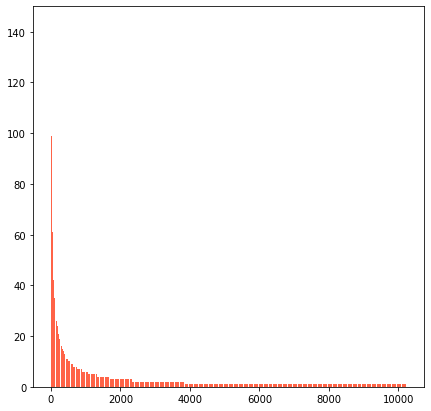

In [8]:
print(train_dataset['object_entity'].value_counts())

fig, axes = plt.subplots(1, 1, figsize=(7, 7))

object_entity_cnt_list = train_dataset['object_entity'].value_counts().values

axes.set_ylim(0,150)
axes.bar(range(len(object_entity_cnt_list)),object_entity_cnt_list, color='tomato')

plt.show()

no_relation                            9513
org:top_members/employees              4277
per:employee_of                        3565
per:title                              2098
org:member_of                          1864
org:alternate_names                    1318
per:origin                             1234
org:place_of_headquarters              1194
per:date_of_birth                      1130
per:alternate_names                     997
per:spouse                              795
per:colleagues                          534
per:parents                             518
org:founded                             450
org:members                             420
per:date_of_death                       417
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

<ipython-input-9-c4b2ff813088>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label_cnt.index,rotation=275)


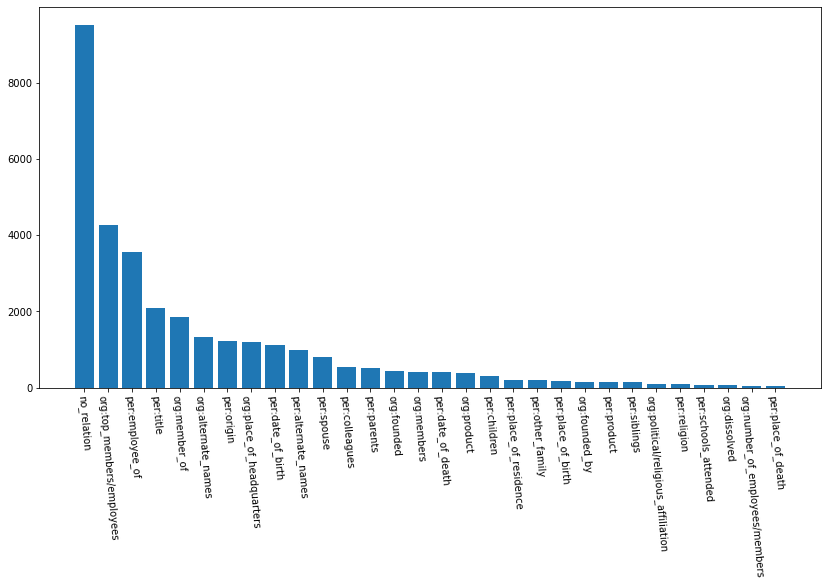

In [9]:
print(train_dataset['label'].value_counts())

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
label_cnt = train_dataset['label'].value_counts()
ax.bar(label_cnt.index,label_cnt)
ax.set_xticklabels(label_cnt.index,rotation=275)
plt.show()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64


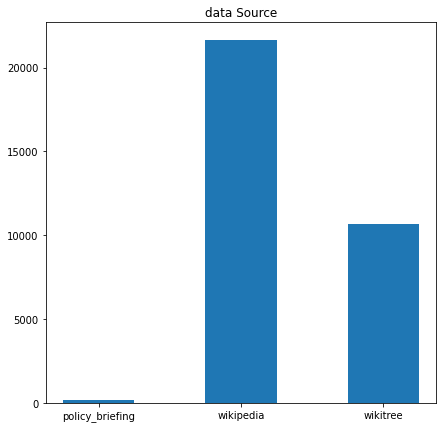

In [10]:
print(raw_dataset['source'].value_counts())

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
source_cnt = raw_dataset['source'].value_counts().sort_index()
ax.set_title('data Source')
ax.bar(source_cnt.index,source_cnt, width=0.5)

plt.show()

In [11]:
group = train_dataset.groupby('subject_entity')['object_entity'].value_counts().sort_values()
display(group)

subject_entity  object_entity
(유)시민버스         시내버스협의회            1
스벤 크라머르         네덜란드               1
카도야 츠카사         디케이드               1
                가면라이더              1
스와로브스키          오스트리아              1
                                ... 
목포시             김종식               74
영암군             전동평               75
광주광역시           이용섭               85
고흥군             송귀근               95
화순군             구충곤              101
Name: object_entity, Length: 17727, dtype: int64

# 라벨 종류

In [12]:
num_to_label = {}
for label in train_dataset['label'].unique():
    num_to_label[label_to_num([label])[0]] = label
    
numbers=[]
labels=[]
for num, label in sorted(num_to_label.items(), key=lambda x:x[0]):
    numbers.append(num)
    labels.append(label)
    #print('{0:2d}'.format(num), '=' , label)
    
pd.DataFrame({'number': numbers, 'label': labels})

,number,label
0,0,no_relation
1,1,org:top_members/employees
2,2,org:members
3,3,org:product
4,4,per:title
5,5,org:alternate_names
6,6,per:employee_of
7,7,org:place_of_headquarters
8,8,per:product
9,9,org:number_of_employees/members


# 문장의 길이

sentence 문장 최대 길이 : 455
sentence 문장의 평균 길이 : 97.07607119721133


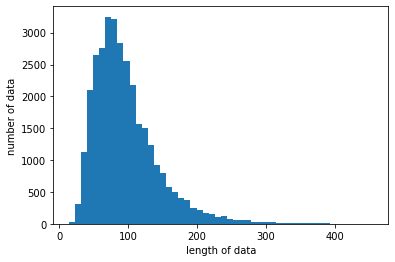

In [13]:
print('sentence 문장 최대 길이 :',max(len(l) for l in train_dataset['sentence']))
print('sentence 문장의 평균 길이 :',sum(map(len, train_dataset['sentence']))/len(train_dataset['sentence']))

plt.hist([len(s) for s in train_dataset['sentence']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

subject_entity 최대 길이 : 44
subject_entity 평균 길이 : 5.1175309251318755


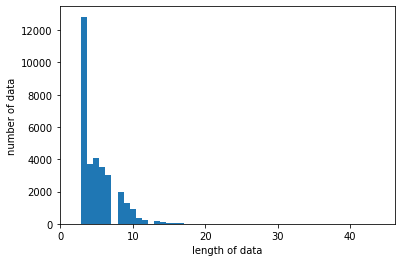

In [14]:
print('subject_entity 최대 길이 :',max(len(l) for l in train_dataset['subject_entity']))
print('subject_entity 평균 길이 :',sum(map(len, train_dataset['subject_entity']))/len(train_dataset['subject_entity']))

plt.hist([len(s) for s in train_dataset['subject_entity']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

object_entity 최대 길이 : 49
object_entity 평균 길이 : 5.17277971434741


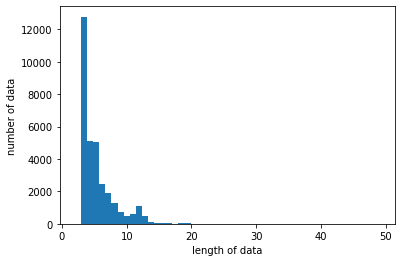

In [15]:
print('object_entity 최대 길이 :',max(len(l) for l in train_dataset['object_entity']))
print('object_entity 평균 길이 :',sum(map(len, train_dataset['object_entity']))/len(train_dataset['object_entity']))

plt.hist([len(s) for s in train_dataset['object_entity']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

# 토큰화 과정 뜯어보기

In [16]:
from transformers import AutoTokenizer

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenized_train = tokenized_dataset(train_dataset, tokenizer)

In [17]:
for key, value in tokenized_train.items():
    print(key, ':')
    print(np.array(value),'\n')

input_ids :
[[    2 29830     3 ...     0     0     0]
 [    2  3772  2139 ...     0     0     0]
 [    2  4104 10904 ...     0     0     0]
 ...
 [    2 18272  2242 ...     0     0     0]
 [    2 15710     3 ...     0     0     0]
 [    2 15437  2242 ...     0     0     0]] 

token_type_ids :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

attention_mask :
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]] 



In [18]:
example_input_token = ''
for x in tokenizer.convert_ids_to_tokens(tokenized_train['input_ids'][0]):
    example_input_token += x

example_input_token

'[CLS]비틀즈[SEP]조지해리##슨[SEP]〈So##me##th##ing〉는조지해리##슨##이쓰##고비틀즈##가1969##년앨범《Ab##be##yRo##ad》에담##은노래##다.[SEP][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD

In [19]:
np.array(tokenizer.convert_ids_to_tokens(tokenized_train['input_ids'][0]))

array(['[CLS]', '비틀즈', '[SEP]', '조지', '해리', '##슨', '[SEP]', '〈', 'So',
       '##me', '##th', '##ing', '〉', '는', '조지', '해리', '##슨', '##이', '쓰',
       '##고', '비틀즈', '##가', '1969', '##년', '앨범', '《', 'Ab', '##be', '##y',
       'Ro', '##ad', '》', '에', '담', '##은', '노래', '##다', '.', '[SEP]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PA

In [20]:
tokenized_train['input_ids'][0]

tensor([    2, 29830,     3,  8373, 14113,  2234,     3,   168, 30985, 14451,
         7088,  4586,   169,   793,  8373, 14113,  2234,  2052,  1363,  2088,
        29830,  2116, 14879,  2440,  6711,   170, 21406, 26713,  2076, 25145,
         5749,   171,  1421,   818,  2073,  4388,  2062,    18,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [21]:
tokenized_train['token_type_ids'][0]

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
tokenized_train['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
train_label = label_to_num(train_dataset['label'].values)

In [24]:
np.array(train_label)

array([ 0,  0, 20, ...,  1,  0,  1])

In [25]:
RE_train_dataset = RE_Dataset(tokenized_train, train_label)

In [26]:
RE_train_dataset

In [27]:
i = 0
for data in RE_train_dataset:
    for key, value in data.items():
        print(key, ' : ')
        print(value,'\n')
    i+=1
    if i == 2:
        break

input_ids  : 
tensor([    2, 29830,     3,  8373, 14113,  2234,     3,   168, 30985, 14451,
         7088,  4586,   169,   793,  8373, 14113,  2234,  2052,  1363,  2088,
        29830,  2116, 14879,  2440,  6711,   170, 21406, 26713,  2076, 25145,
         5749,   171,  1421,   818,  2073,  4388,  2062,    18,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

# 최대 길이 문장들

#### 최대 길이 sentence

In [28]:
max_len_sentence = ""
m = 0
for sent in train_dataset['sentence']:
    if m<len(sent):
        m = len(sent)
        max_len_sentence=sent
    
print(max_len_sentence)

그의 1984년 책인 《머릿속의 혁명: 비틀즈 음반과 60년대》 Revolution in the Head: The Beatles'Records and the Sixties)는 광범위한 주제와 영감의 원천을 예시로 들며 비틀즈 각각의 음반을 조심스럽게 분석하고 있다. 이 책에는 그들 노래를 개별적으로 분석한 내용이 수록되어 있으나, 동시에 주관적인 비평이 쓰여 있다. 폴 매카트니는 이러한 그의 사족에 불만을 표했다. 책을 위해 비틀즈의 오리지널 마스터 테이프에도 접근하여 조사를 했다. 책에는 1960년대 문화와 사회 변화와 비틀즈의 여파를 조사한 〈Fabled Foursome, Disappearing Decade〉이라는 수필도 존재한다. 싱글 차트 정상에 오른 비틀즈 싱글에 대해 쓰여진 책을 2002년 별도로 발간했다. 이 편집본은 새롭고 더 줄인 소개와 비틀즈의 컴필레이션 《1 에 수록된 곡만을 넣었다.


In [29]:
tokenized_max_len_sentence = tokenizer(max_len_sentence,
                                       return_tensors="pt",
                                       padding=True,
                                       truncation=True,
                                       max_length=256,
                                       add_special_tokens=True,
                                      )
tokenized_max_len_sentence_string = ""
for x in tokenizer.convert_ids_to_tokens(tokenized_max_len_sentence['input_ids'][0]):
    tokenized_max_len_sentence_string += x

print(tokenized_max_len_sentence_string)
print(len(tokenized_max_len_sentence_string))
print(tokenized_max_len_sentence['input_ids'][0])
print(len(tokenizer.convert_ids_to_tokens(tokenized_max_len_sentence['input_ids'][0])))

[CLS]그##의1984##년책##인《머릿속##의혁명:비틀즈음반##과60##년##대》Rev##olutionintheHe##ad:TheBe##at##les'Rec##ord##sandtheS##ix##ti##es)는광범위##한주제##와영감##의원천##을예시##로들##며비틀즈각각##의음반##을조심##스럽##게분석##하고있##다.이책##에##는그##들노래##를개별##적으로분석##한내용##이수록##되##어있##으나,동시##에주관##적인비평##이쓰여있##다.폴매카##트니##는이러##한그##의사##족##에불만##을표했##다.책##을위해비틀즈##의오리지널마스터테이프##에도접근##하여조사##를했##다.책##에##는1960##년##대문화##와사회변화##와비틀즈##의여파##를조사##한〈F##able##dF##our##s##ome,Dis##app##ear##ingDec##ade〉이라##는수필##도존재##한다.싱글차트정상##에오른비틀즈싱글##에대해쓰여진책##을2002##년별도##로발간##했##다.이편집##본##은새롭##고더줄인소개##와비틀즈##의컴##필##레이션《1에수록##된곡##만##을넣##었##다.[SEP]
560
tensor([    2,   636,  2079, 11044,  2440,  1644,  2179,   170,  8370,  2079,
         4904,    30, 29830,  8842,  2145,  4343,  2440,  2104,   171, 18359,
        23435,  5011,  5062, 13472,  5749,    30,  5790, 17488,  4493, 15546,
           11, 26428, 13135,  2041,  5433,  5062,    55, 19699,  4028,  4080,
           13,   793,  9774,  2470,  4551,  2522,  8612,  2079,  7848,  2069,
        18369,  2200,   882,  2307, 29830,  4

#### 최대 길이 subject_entity

In [30]:
max_len_sub = ""
m = 0
for sent in train_dataset['subject_entity']:
    if m<len(sent):
        m = len(sent)
        max_len_sub=sent
        
max_len_sub

'Massachusetts Department of Energy Resources'

#### 최대 길이 object_entity

In [31]:
max_len_obj = ""
m = 0
for sent in train_dataset['object_entity']:
    if m<len(sent):
        m = len(sent)
        max_len_obj=sent
        
max_len_obj

'International Critical Incident Stress Foundation'

In [32]:
max_ject_entity = max_len_sub +'[SEP]' + max_len_obj
tokenized_max_len_intput = tokenizer(
    max_ject_entity, 
    max_len_sentence,return_tensors="pt",
    padding=True,
    truncation=True,
    max_length=256,
    add_special_tokens=True,
)

tokenized_max_len_input_string = ""
for x in tokenizer.convert_ids_to_tokens(tokenized_max_len_intput['input_ids'][0]):
    tokenized_max_len_input_string += x
#tokenized_max_len_input_string = re.sub('#','',tokenized_max_len_input_string)
print(tokenized_max_len_input_string)
print(tokenized_max_len_intput['input_ids'][0])
print(len(tokenizer.convert_ids_to_tokens(tokenized_max_len_intput['input_ids'][0])))

[CLS]Ma##ss##ach##us##ett##sDe##p##art##mentofEn##er##gyRes##our##ce##s[SEP]InternationalC##rit##icalInc##ide##ntSt##ressF##ound##ation[SEP]그##의1984##년책##인《머릿속##의혁명:비틀즈음반##과60##년##대》Rev##olutionintheHe##ad:TheBe##at##les'Rec##ord##sandtheS##ix##ti##es)는광범위##한주제##와영감##의원천##을예시##로들##며비틀즈각각##의음반##을조심##스럽##게분석##하고있##다.이책##에##는그##들노래##를개별##적으로분석##한내용##이수록##되##어있##으나,동시##에주관##적인비평##이쓰여있##다.폴매카##트니##는이러##한그##의사##족##에불만##을표했##다.책##을위해비틀즈##의오리지널마스터테이프##에도접근##하여조사##를했##다.책##에##는1960##년##대문화##와사회변화##와비틀즈##의여파##를조사##한〈F##able##dF##our##s##ome,Dis##app##ear##ingDec##ade〉이라##는수필##도존재##한다.싱글차트정상##에오른비틀즈싱글##에대해쓰여진책##을2002##년별도##로발간##했##다.이편집##본##은새롭##고더줄인소개##와비틀즈##의컴##필##레이션《1에수록##된곡##만##을넣##었##다.[SEP]
tensor([    2, 26736,  9864, 13329,  5722, 21794,  2041, 13954,  2006,  8443,
         9025,  4868, 11349,  3762, 24193, 15791,  8330,  6259,  2041,     3,
        17165,    39, 23363, 12227, 25758, 14811, 30062,  6552, 16304,    42,
        16752,  5148,     3,   636,  2079, 11044,  2440,  1644,  2179,

In [34]:
aug_train_dataset = pd.read_csv("../dataset/train/trainslate_en_train.csv")

In [35]:
len(aug_train_dataset)

32417

In [36]:
len(train_dataset)

32417

32469

In [46]:
new_row = {'id':, 'sentence':"hi", 'subject_entity':"hi", 'object_entity':"hi", 'label':"hi"}
train_dataset = train_dataset.append(new_row, ignore_index=True)
train_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation
...,...,...,...,...,...
32415,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,no_relation
32416,32469,화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...,화순군,구충곤,org:top_members/employees
32417,32470,hi,hi,hi,hi
32418,32471,hi,hi,hi,hi
